In [3]:
import os
path = r"D:\2nd_semester\bigdatascience\project\Dataset\\"
os.listdir(path)

['test', 'train']

In [4]:
os.listdir(path + "\\" + "test")

['FAKE', 'REAL']

In [5]:
os.listdir(path +  "\\" + "test" + "\\" + "FAKE")

['avtycwsgyb.mp4',
 'avvdgsennp.mp4',
 'avywawptfc.mp4',
 'awhmfnnjih.mp4',
 'awnwkrqibf.mp4',
 'awukslzjra.mp4',
 'axczxisdtb.mp4',
 'axoygtekut.mp4',
 'axwgcsyphv.mp4',
 'axwovszumc.mp4',
 'ayqvfdhslr.mp4',
 'azpuxunqyo.mp4',
 'azsmewqghg.mp4',
 'bahdpoesir.mp4',
 'bbhpvrmbse.mp4']

In [16]:
import os
import sys
from PIL import Image
from tqdm import tqdm
import dlib
path = r"D:\2nd_semester\bigdatascience\project\P1\200-celebahq-1024x1024"
out_dir = r"D:\2nd_semester\bigdatascience\project\P1\fake_faces\\"
detector = dlib.get_frontal_face_detector()

for f in tqdm(os.listdir(path)):
    os.chdir(path)
    img = dlib.load_rgb_image(f)
    dets = detector(img, 1)
    for i, d in enumerate(dets):
        im = Image.open(f).convert('LA')
        im = im.crop((d.left(), d.top(), d.right(), d.bottom())) 
        im = im.resize((64,64), Image.ANTIALIAS)
        im.save(out_dir + f, quality = 95)
    win.clear_overlay()
    win.set_image(img)
    win.add_overlay(dets)
    dlib.hit_enter_to_continue()

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:15<00:00, 10.24it/s]


In [45]:
path = r"D:\2nd_semester\bigdatascience\project\P1\60j\\"
out_dir = r"D:\2nd_semester\bigdatascience\project\P1\real_faces_png\\"

for f in tqdm(os.listdir(path)):
    os.chdir(path)
    im = Image.open(f)
    im.save(out_dir + f.replace("jpg","png"))

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 74.36it/s]


In [46]:
import os
import sys
from PIL import Image
from tqdm import tqdm
import dlib
import cv2
path = r"D:\2nd_semester\bigdatascience\project\P1\real_faces_png\\"
out_dir = r"D:\2nd_semester\bigdatascience\project\P1\real_faces\\"
detector = dlib.get_frontal_face_detector()

for f in tqdm(os.listdir(path)):
    os.chdir(path)
    img = dlib.load_rgb_image(f)
    dets = detector(img, 1)
    for i, d in enumerate(dets):
        if not dets: print("Face not found")
        im = Image.open(f).convert('LA')
        im = im.crop((d.left(), d.top(), d.right(), d.bottom())) 
        im = im.resize((64,64), Image.ANTIALIAS)
        im.save(out_dir + f, quality = 95)
    win.clear_overlay()
    win.set_image(img)
    win.add_overlay(dets)
    dlib.hit_enter_to_continue()

100%|██████████████████████████████████████████████████████████████████████████████| 2062/2062 [01:11<00:00, 28.76it/s]


In [14]:
import random
import os
import shutil
l = random.sample(range(1, 202599), 2000)
l =[str(i).zfill(6)+'.jpg' for i in l]
path = r"D:\2nd_semester\bigdatascience\project\P1\img_align_celeba\img_align_celeba\\"
out = r"D:\2nd_semester\bigdatascience\project\P1\test_real_faces\\"
for i in tqdm(l):
    shutil.copy(path + i, out + i)
        

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:16<00:00, 26.07it/s]


In [125]:
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from keras.optimizers import Adam

IMGWIDTH = 64

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

class CGFACE(Classifier):
    def __init__(self, learning_rate = 0.0001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (IMGWIDTH, IMGWIDTH, 1))
        
        x1 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x)
        x1 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        x1 = Dropout(0.2)(x1)
        
        x2 = Conv2D(16,(3, 3), padding='same', activation = 'relu')(x1)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        x2 = Dropout(0.2)(x2)
        
        x3 = Conv2D(16, (3, 3), padding='same', activation = 'relu')(x2)
        #x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        x3 = Dropout(0.2)(x3)
        
        x4 = Conv2D(16, (3, 3), padding='same', activation = 'relu')(x3)
        x4 = Dropout(0.2)(x4)
        
        y = Flatten()(x4)
        y = Dense(256)(y)
        y = Dense(1, activation = 'sigmoid')(y)
                  
        return KerasModel(inputs = x, outputs = y)


In [126]:
model = CGFACE()

In [141]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
path = r"D:\2nd_semester\bigdatascience\project\P1\real_faces\\"
X = []
Y = []

for i in tqdm(os.listdir(path)):
    img = cv2.imread(path + i , cv2.IMREAD_GRAYSCALE)
    norm_image = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    X.append(norm_image)
    Y.append(1)

100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1745.41it/s]


In [142]:
path = r"D:\2nd_semester\bigdatascience\project\P1\fake_faces\\"

for i in tqdm(os.listdir(path)):
    img = cv2.imread(path + i , cv2.IMREAD_GRAYSCALE)
    norm_image = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    X.append(norm_image)
    Y.append(0)

100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1738.70it/s]


In [143]:
X = np.array(X)
Y = np.array(Y)

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(X, Y, test_size=0.2,
                                                  random_state=42)

In [147]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

In [148]:
model.fit(X_train, ytrain)

[0.2503901, 0.5146875]

In [149]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [151]:
model.predict(X_test)

array([[0.49052137],
       [0.48583907],
       [0.48262647],
       [0.4941943 ],
       [0.4893438 ],
       [0.48780426],
       [0.49181148],
       [0.48575836],
       [0.48672748],
       [0.487569  ],
       [0.4885667 ],
       [0.49063694],
       [0.49384853],
       [0.47677878],
       [0.49015948],
       [0.48567975],
       [0.49005622],
       [0.49329445],
       [0.48623726],
       [0.49141768],
       [0.4776657 ],
       [0.49513787],
       [0.48829532],
       [0.49173006],
       [0.48920116],
       [0.4897189 ],
       [0.49513927],
       [0.48872244],
       [0.49036193],
       [0.49246445],
       [0.48861668],
       [0.49620938],
       [0.487876  ],
       [0.48671833],
       [0.48667902],
       [0.4872273 ],
       [0.48094043],
       [0.47912464],
       [0.49162632],
       [0.48979756],
       [0.49325272],
       [0.49347028],
       [0.49134678],
       [0.49600175],
       [0.49095452],
       [0.4937891 ],
       [0.48890793],
       [0.487

In [7]:
!pip install radfil

In [9]:
import cv2
import numpy as np
import os
os.chdir(r'D:\2nd_semester\bigdatascience\project\P1\img_align_celeba\img_align_celeba\\')
import radialProfile
import glob
from matplotlib import pyplot as plt
import pickle
from scipy.interpolate import griddata

ModuleNotFoundError: No module named 'radialProfile'

In [7]:
import numpy as np
import pandas as pd
import os


In [8]:
PIC_DIR = r'D:\2nd_semester\bigdatascience\project\P1\img_align_celeba\img_align_celeba\\'
    
from tqdm import tqdm
from PIL import Image

IMAGES_COUNT = 10000

ORIG_WIDTH = 178
ORIG_HEIGHT = 218
diff = (ORIG_HEIGHT - ORIG_WIDTH) // 2

WIDTH = 128
HEIGHT = 128

crop_rect = (0, diff, ORIG_WIDTH, ORIG_HEIGHT - diff)

images = []
for pic_file in tqdm(os.listdir(PIC_DIR)[:IMAGES_COUNT]):
    pic = Image.open(PIC_DIR + pic_file).crop(crop_rect)
    pic.thumbnail((WIDTH, HEIGHT), Image.ANTIALIAS)
    images.append(np.uint8(pic))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:31<00:00, 320.53it/s]


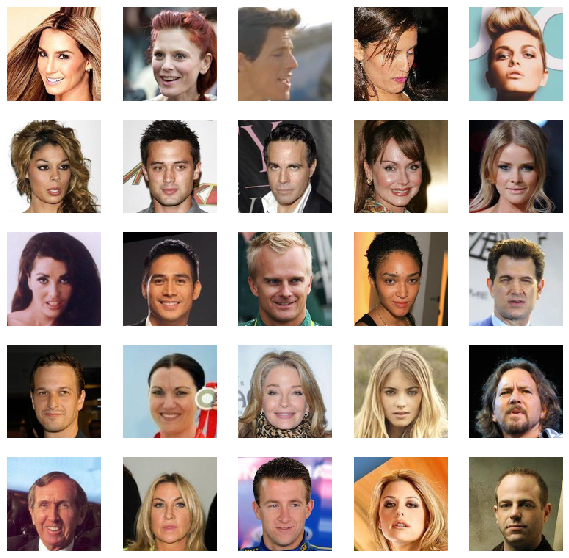

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#Normalize the images
images = np.array(images) / 255
images.shape
#print first 25 images
plt.figure(1, figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

In [12]:

from keras import Input
from keras.layers import Dense, Reshape, LeakyReLU, Conv2D, Conv2DTranspose, Flatten, Dropout
from keras.models import Model
from keras.optimizers import RMSprop

LATENT_DIM = 32
CHANNELS = 3

Using TensorFlow backend.


# create a Generator & Discriminator

In [13]:
def create_generator():
    gen_input = Input(shape=(LATENT_DIM, ))

    x = Dense(128 * 16 * 16)(gen_input)
    x = LeakyReLU()(x)
    x = Reshape((16, 16, 128))(x)

    x = Conv2D(256, 5, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(CHANNELS, 7, activation='tanh', padding='same')(x)

    generator = Model(gen_input, x)
    return generator

def create_discriminator():
    disc_input = Input(shape=(HEIGHT, WIDTH, CHANNELS))

    x = Conv2D(256, 3)(disc_input)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Flatten()(x)
    x = Dropout(0.4)(x)

    x = Dense(1, activation='sigmoid')(x)
    discriminator = Model(disc_input, x)

    optimizer = RMSprop(
        lr=.0001,
        clipvalue=1.0,
        decay=1e-8
    )

    discriminator.compile(
        optimizer=optimizer,
        loss='binary_crossentropy'
    )

    return discriminator



generator = create_generator()
discriminator = create_discriminator()
discriminator.trainable = False

In [14]:
gan_input = Input(shape=(LATENT_DIM, ))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)

optimizer = RMSprop(lr=.0001, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=optimizer, loss='binary_crossentropy')

In [10]:


data= {}
epsilon = 1e-8
N = 80
y = []
error = []

number_iter = 1000

psd1D_total = np.zeros([number_iter, N])
label_total = np.zeros([number_iter])
psd1D_org_mean = np.zeros(N)
psd1D_org_std = np.zeros(N)


cont = 0

#fake data
rootdir = 'D:\2nd_semester\bigdatascience\project\P1\img_align_celeba\img_align_celeba\\'

for filename in glob.glob(rootdir+"*.jpg"):
    img = cv2.imread(filename,0)
    
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift += epsilon
    
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)

    # Calculate the azimuthally averaged 1D power spectrum
    points = np.linspace(0,N,num=psd1D.size) # coordinates of a
    xi = np.linspace(0,N,num=N) # coordinates for interpolation

    interpolated = griddata(points,psd1D,xi,method='cubic')
    interpolated /= interpolated[0]

    psd1D_total[cont,:] = interpolated             
    label_total[cont] = 1
    cont+=1

    if cont == number_iter:
        break

for x in range(N):
    psd1D_org_mean[x] = np.mean(psd1D_total[:,x])
    psd1D_org_std[x]= np.std(psd1D_total[:,x])
    

## real data
psd1D_total2 = np.zeros([number_iter, N])
label_total2 = np.zeros([number_iter])
psd1D_org_mean2 = np.zeros(N)
psd1D_org_std2 = np.zeros(N)

cont = 0
rootdir2 = 'D:\2nd_semester\bigdatascience\project\P1\img_align_celeba\img_align_celeba\\'


for filename in glob.glob(rootdir2+"*.jpg"):     
    img = cv2.imread(filename,0)

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift += epsilon

    magnitude_spectrum = 20*np.log(np.abs(fshift))

    # Calculate the azimuthally averaged 1D power spectrum
    psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)

    points = np.linspace(0,N,num=psd1D.size) # coordinates of a
    xi = np.linspace(0,N,num=N) # coordinates for interpolation

    interpolated = griddata(points,psd1D,xi,method='cubic')

    interpolated /= interpolated[0]

    psd1D_total2[cont,:] = interpolated             
    label_total2[cont] = 0
    cont+=1
    
    if cont == number_iter:
        break

for x in range(N):
    psd1D_org_mean2[x] = np.mean(psd1D_total2[:,x])
    psd1D_org_std2[x]= np.std(psd1D_total2[:,x])
    

y.append(psd1D_org_mean)
y.append(psd1D_org_mean2)
error.append(psd1D_org_std)
error.append(psd1D_org_std2)

psd1D_total_final = np.concatenate((psd1D_total,psd1D_total2), axis=0)
label_total_final = np.concatenate((label_total,label_total2), axis=0)

data["data"] = psd1D_total_final
data["label"] = label_total_final

output = open('celeba_low_1000.pkl', 'wb')
pickle.dump(data, output)
output.close()

print("DATA Saved")

DATA Saved


In [13]:

import numpy as np
import matplotlib.pyplot as plt
import pickle

# load feature file
pkl_file = open('celeba_low_1000.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
X = data["data"]
y = data["label"]

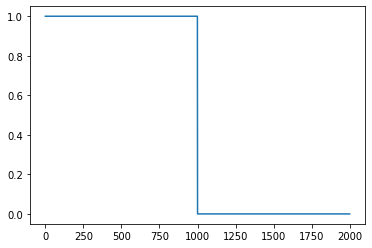

In [14]:

plt.plot(y)

Text(0, 0.5, 'Power of Spectrum')

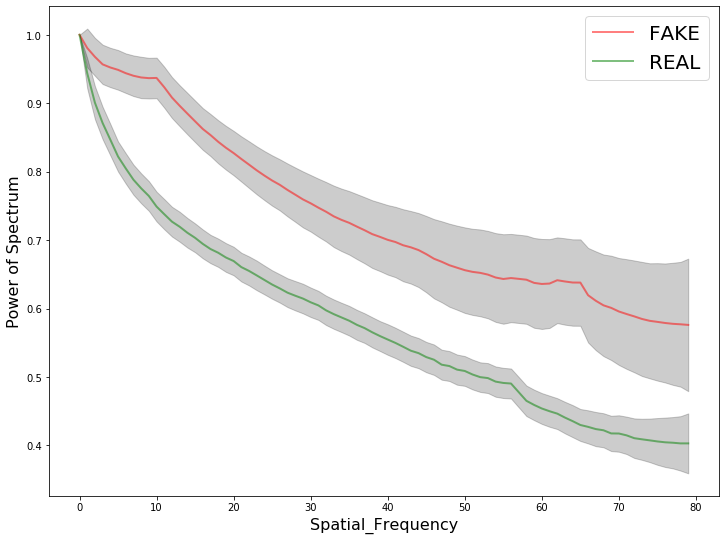

In [22]:
num = int(X.shape[0]/2)
num_feat = X.shape[1]

psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X.shape[0]):
    if y[x]==0:
        psd1D_org_0[cont_0,:] = X[x,:]
        cont_0+=1
    elif y[x]==1:
        psd1D_org_1[cont_1,:] = X[x,:]
        cont_1+=1

# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='Red', label='FAKE', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='black', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='green', label='REAL', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='black', alpha=0.2)

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial_Frequency", fontsize=16)
plt.ylabel("Power of Spectrum", fontsize=16)
#plt.savefig('1000_celeba.png', bbox_inches='tight')

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

num = 10
LR = 0
SVM = 0
SVM_r = 0
SVM_p = 0


for z in range(num):
    # read python dict back from the file
    pkl_file = open('celeba_low_1000.pkl', 'rb')
    
    data = pickle.load(pkl_file)

    pkl_file.close()
    X = data["data"]
    y = data["label"]


    try:

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

        from sklearn.svm import SVC
        svclassifier = SVC(kernel='linear')
        svclassifier.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(svclassifier.score(X_test, y_test)))
               
        from sklearn.svm import SVC
        svclassifier_r = SVC(C=6.37, kernel='rbf', gamma=0.86)
        svclassifier_r.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(svclassifier_r.score(X_test, y_test)))
                
        from sklearn.svm import SVC
        svclassifier_p = SVC(kernel='poly')
        svclassifier_p.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(svclassifier_p.score(X_test, y_test)))
        
        from sklearn.linear_model import LogisticRegression
        logreg = LogisticRegression(solver='liblinear', max_iter=1000)
        logreg.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

        
        SVM+=svclassifier.score(X_test, y_test)
        SVM_r+=svclassifier_r.score(X_test, y_test)
        SVM_p+=svclassifier_p.score(X_test, y_test)
        LR+=logreg.score(X_test, y_test)

        
    except:
        num-=1
        print(num)
    
print("Average SVM: "+str(SVM/num))
print("Average SVM_r: "+str(SVM_r/num))
print("Average SVM_p: "+str(SVM_p/num))
print("Average LR: "+str(LR/num))

Average SVM: 0.9995
Average SVM_r: 1.0
Average SVM_p: 0.99975
Average LR: 0.9974999999999999
